In [4]:
!pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [2]:
data = pd.read_csv('data.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(303, 7)
['age', 'cp', 'thalach', 'oldpeak', 'ca', 'thal', 'target']


In [3]:
data.head()

,age,cp,thalach,oldpeak,ca,thal,target
0,63,3,150,2.3,0,1,1
1,37,2,187,3.5,0,2,1
2,41,1,172,1.4,0,2,1
3,56,1,178,0.8,0,2,1
4,57,0,163,0.6,0,2,1


#### Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric) 

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [4]:
data['cp'].unique()

array([3, 2, 1, 0])

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

data['cp']=np.where(data['cp'] =='3', 'Pain', data['cp'])
data['cp']=np.where(data['cp'] =='2', 'Pain', data['cp'])
data['cp']=np.where(data['cp'] =='1', 'Pain', data['cp'])
data['cp']=np.where(data['cp'] =='0', 'Pain', data['cp'])

After grouping, this is the columns

In [5]:
data['cp'].unique()

array([3, 2, 1, 0])

### Data exploration

In [6]:
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

C:\Users\sanja\AppData\Local\Temp\ipykernel_15196\606687641.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=data, palette='hls')


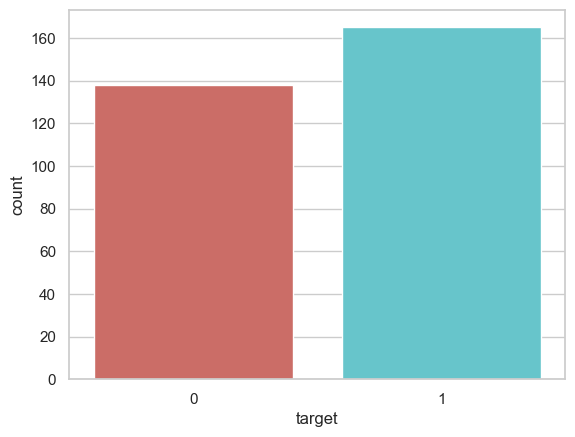

<Figure size 640x480 with 0 Axes>

In [7]:
sns.countplot(x='target',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

There are 36548 no's and 4640 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

In [8]:
data.groupby('target').mean()

,age,cp,thalach,oldpeak,ca,thal
target,,,,,,
0,56.601449,0.478261,139.101449,1.585507,1.166667,2.543478
1,52.496970,1.375758,158.466667,0.583030,0.363636,2.121212


Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn't.
The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [10]:
data.groupby('age').mean()

,cp,thalach,oldpeak,ca,thal,target
age,,,,,,
29,1.000000,202.000000,0.000000,0.000000,2.000000,1.000000
34,2.000000,183.000000,0.350000,0.000000,2.000000,1.000000
35,0.250000,160.500000,0.750000,0.000000,2.500000,0.500000
37,2.000000,178.500000,1.750000,0.000000,2.000000,1.000000
38,2.333333,176.000000,1.266667,2.666667,2.333333,0.666667
39,1.500000,163.250000,0.300000,0.000000,2.250000,0.750000
40,1.000000,157.666667,1.133333,0.000000,3.000000,0.333333
41,1.200000,164.700000,0.340000,0.100000,2.000000,0.900000
42,1.250000,160.250000,0.500000,0.250000,2.000000,0.875000


In [11]:
data.groupby('thalach').mean()

,age,cp,oldpeak,ca,thal,target
thalach,,,,,,
71,67.0,0.0,1.0,0.0,2.0,0.0
88,57.0,0.0,1.2,1.0,3.0,0.0
90,59.0,0.0,1.0,2.0,1.0,0.0
95,53.0,0.0,2.0,2.0,3.0,0.0
96,62.0,1.0,1.1,0.5,2.0,0.5
...,...,...,...,...,...,...
190,52.0,3.0,0.0,0.0,1.0,1.0
192,34.0,1.0,0.7,0.0,2.0,1.0
194,42.0,2.0,0.8,0.0,3.0,1.0


In [12]:
data.groupby('ca').mean()

,age,cp,thalach,oldpeak,thal,target
ca,,,,,,
0,51.645714,1.137143,154.988571,0.836571,2.222857,0.742857
1,57.476923,0.876923,141.092308,1.013846,2.430769,0.323077
2,59.789474,0.500000,146.210526,1.707895,2.421053,0.184211
3,59.900000,0.550000,134.550000,1.865000,2.500000,0.150000
4,45.800000,1.400000,160.400000,0.100000,2.400000,0.800000


Visualizations

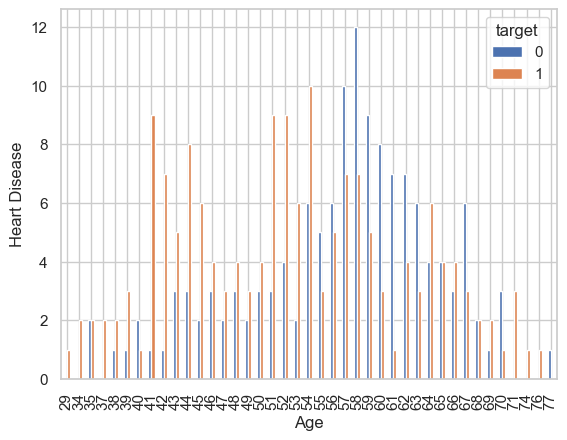

In [13]:
%matplotlib inline
pd.crosstab(data.age,data.target).plot(kind='bar')
plt.title('')
plt.xlabel('Age')
plt.ylabel('Heart Disease')
plt.savefig('age_vs_disease')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

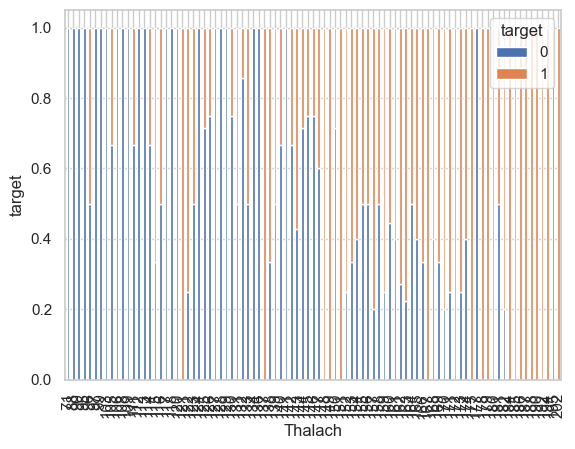

In [14]:
table=pd.crosstab(data.thalach,data.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('')
plt.xlabel('Thalach')
plt.ylabel('target')
plt.savefig('thalach_vs_disease')

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

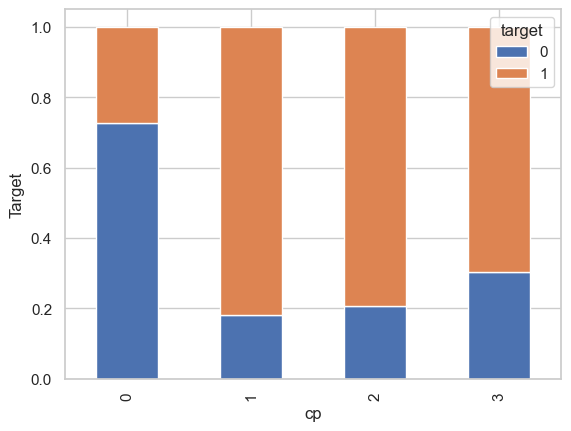

In [15]:
table=pd.crosstab(data.cp,data.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('')
plt.xlabel('cp')
plt.ylabel('Target')
plt.savefig('cp_vs_disease')

Education seems a good predictor of the outcome variable.

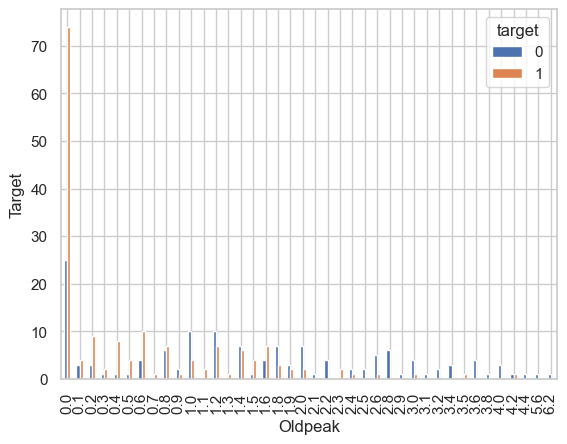

In [16]:
pd.crosstab(data.oldpeak,data.target).plot(kind='bar')
plt.title('')
plt.xlabel('Oldpeak')
plt.ylabel('Target')
plt.savefig('oldpeak_vs_target')

Day of week may not be a good predictor of the outcome

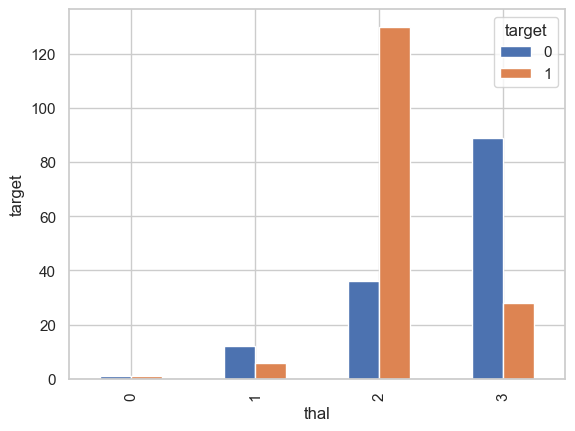

In [17]:
pd.crosstab(data.thal,data.target).plot(kind='bar')
plt.title('')
plt.xlabel('thal')
plt.ylabel('target')
plt.savefig('thal_vs_target')

Month might be a good predictor of the outcome variable

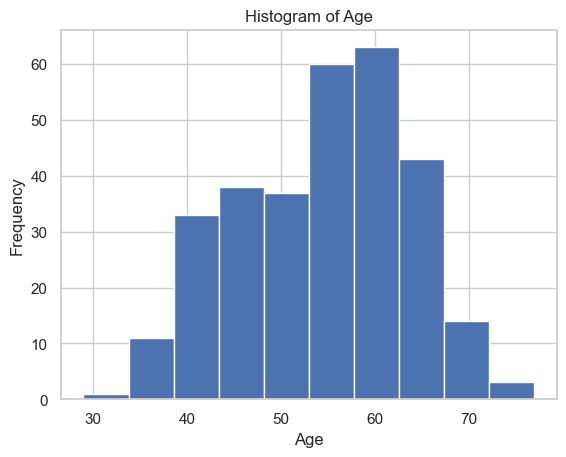

In [18]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

The most of the customers of the bank in this dataset are in the age range of 30-40.

pd.crosstab(data.,data.target).plot(kind='bar')
plt.title('')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome seems to be a good predictor of the outcome variable.

### Create dummy variables

In [19]:
cat_vars=
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [40]:
cat_vars=['age', 'cp', 'thalach', 'oldpeak', 'ca', 'thal']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [41]:
data_final=data[to_keep]
data_final.columns.values

array(['target'], dtype=object)

In [42]:
data_final_vars=data_final.columns.values.tolist()
y=['target']
x=[i for i in data_final_vars if i not in y]

### Feature Selection

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg)
rfe = rfe.fit(6,data_final[x], data_final[y])
print(rfe.support_)
print(rfe.ranking_)

The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [48]:
cols=['age', 'cp', 'thalach', 'oldpeak', 'ca', 'thal']
X=data[cols]
y=data['target']

### Implementing the model

In [49]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.402781
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            5
Date:                Sun, 09 Mar 2025   Pseudo R-squ.:                  0.4156
Time:                        19:39:22   Log-Likelihood:                -122.04
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 1.273e-35
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0056      0.013     -0.442      0.658      -0.031       0.019
cp             0.8629      0.

The p-values for most of the variables are very small, therefore, most of them are significant to the model.

### Logistic Regression Model Fitting

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\sanja\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Predicting the test set results and caculating the accuracy

In [51]:
y_pred = logreg.predict(X_test)

In [52]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


### Cross Validation

In [56]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\sanja\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sanja\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

10-fold cross validation average accuracy: 0.817


C:\Users\sanja\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion Matrix

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[32 12]
 [ 6 41]]


The result is telling us that we have 10872+254 correct predictions and 1122+109 incorrect predictions.

#### Accuracy

In [58]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

NameError: name 'classifier' is not defined

#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        44
           1       0.77      0.87      0.82        47

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



#### Interpretation: 

Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 90% of the customer's preferred term deposit were promoted.

### ROC Curvefrom sklearn import metrics
from ggplot import *

prob = clf1.predict_proba(X_test)[:,1]
fpr, sensitivity, _ = metrics.roc_curve(Y_test, prob)

df = pd.DataFrame(dict(fpr=fpr, sensitivity=sensitivity))
ggplot(df, aes(x='fpr', y='sensitivity')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

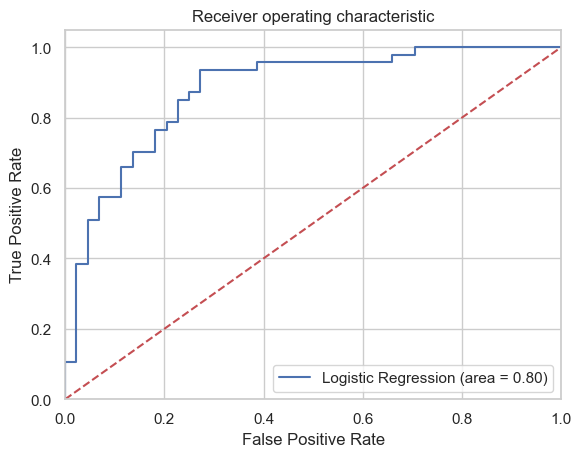

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()